# Retinal Cyst detection
## First look at unet
<img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/project.png?raw=1" width="350" height="350" align="right">

*Abstract— This work aims to develop an algorithm for automatic segmentation of fluid types in retina fundus images using U-net, with annotated images provided by two clinical centers, which were acquired with the three most common [OCT](https://en.wikipedia.org/wiki/Optical_coherence_tomography) device vendors from patients with two different retinal diseases*.  

The rest of the project can be found on the [intraretinal-cyst-fluid-detection](https://github.com/gabrielraya/intraretinal-cyst-fluid-detection) repository on Github. 

**Challenge**: [https://icon.grand-challenge.org/](https://icon.grand-challenge.org/)



## Clinical background

Age-related macular degeneration (AMD) is the most prevalent cause for blindness in the developed world. Over the last ten years, anti-VEGF intravitreal injections for the treatment of AMD have had an impact on disease progression globally and have provided patients with many valuable additional years of vision. The success of anti-VEGF treatment is reliant on the accurate assessment of individual disease activity, specifically the evaluation of location, size and evolution of fluid, such as intraretinal cysts. Fluid accumulation is best visualized on optical coherence tomography (SD-OCT) imaging, an almost indispensable tool in the assessment of AMD treatment success. Therefore, for each injection, information about fluid is extracted from an OCT scan, a prediction is made and this is distilled into a treatment decision. Currently, this is a manual process, performed by the treating clinician and requires a large amount of time for every treatment. 

The Intraretinal Cyst segmentatiON (ICON) challenge aims at evaluating and comparing automated algorithms for the segmentation of intraretinal cyst fluid, a type of fluid correlated with AMD treatment response. These algorithms could provide expert support to clinicians during treatment decision and to substantially improve the quality of AMD care. We have produced ground truth semantic segmentations for 175 OCT scans. 122 of these will be released for model training and validation, and the remaining 53 will be held out for objective model evaluation.



## Data
<img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/img1_raw_data.png?raw=1" width="400" height="250" align="right">

In this project, we are going to develop a system to automatically **detect intraretinal cyst fluids** in human retina fundus images. For this purpose, we are going to use data from the **RETOUCH dataset**, a similar version used for the  (https://retouch.grand-challenge.org/). The original dataset is an anonymized collection of a total of 112 maculacentered OCT volumes of 122 patients from Medical University of Vienna (MUV) in Austria, and the Erasmus  University Medical Center (ERASMUS). A total 122 OCT volumetric scans (11,334 B-scans) and manual annotations for training. 

The original GlaS dataset consists of  122 OCT volumetric scans (11,334 B-scans), X used for training and Y used for testing. Each case contains:
* a small crop of a fundus (8-bit) image
* manual annotations of ICF, provided as a binary map

Similar to what done in the original U-Net paper, the main task of this ICON challenge is **instance segmentation**, meaning that participants in the challenge have to build a model that is good at separating *FLUIDS* from background (segmentation) but also at identifying/detecting *FLUIDS*. Therefore, the type of manual annotations that come with the original RETOUCH dataset dataset is similar to what shown in the image on the right in this cell. You can clearly see that each FLUID in the manually annotated mask gets only one label. Additionally, the size of images in the original dataset is not fixed and is approximately 500 x 700 pixels.



### "Binary ICON 256"
In the preprocessing part, we have simplified things a bit. In particular:
* we have resized all images to 256x256, both in the training and in the test set
* we have converted all manual annotations to a binary form, removing the task of instance segmentation
* **Unbalanced class**: Most of the scans are not label, which means that the data label is skwed to the first class (background)

Examples of images in the dataset of this dataset (which we can call "binary icon 256") are the following:

<table>
<tr>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat1_scan17.png?raw=1" width="200" height="150" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat1_scan17_anno.png?raw=1" width="200" height="200" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat2_scan17.png?raw=1" width="200" height="150" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat2_scan17_anno.png?raw=1" width="200" height="200" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat3_scan16.png?raw=1" width="200" height="200" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat3_scan16_anno.png?raw=1" width="200" height="200" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat4_scan16.png?raw=1" width="200" height="200" align="left"></td>
<td><img src="https://github.com/gabrielraya/intraretinal-cyst-fluid-detection/blob/master/code/images/pat4_scan16_anno.png?raw=1" width="200" height="200" align="left"></td>
</tr>
</table>


This means that the datasets this project uses are a modified version of the original ones, and are only valid for the purpose of this project. **Notice that the images are display in color but all the images are 8-bit images (0-255) while the annotated images are binary images (0-1)**. Previous images were manually select for visualization purposes, a lot of images labeled as background were discarded for this purpose.


# Colab or Local Host
IF you are using Colab set the next variable to true otherwhise set it to false

In [1]:
#colab = True
colab = False

## Libraries

First, we import the basic libraries necessary to develop this assignment. Feel free to include more libraries if needed.


In [2]:
# First make sure you have install these two libraries:
if colab == True:
    !pip install SimpleITK
    print("This program is running from Colab")
#!pip install -U pydicom
else:
    print("This program is running from Local Host | NVIDIA DGX-1")

This program is running from Local Host | NVIDIA DGX-1


In [3]:
# Import all libraries

# maybe 
#import pydicom as dicom

# file processing
import requests
import zipfile
import os

# image
import SimpleITK as sitk
from scipy.ndimage.interpolation import rotate
#from skimage.transform import rescale, resize
from IPython.display import clear_output
from IPython import display

#visualizations
from tqdm import tnrange, tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.figsize'] = [8, 6]

# other
from random import randint
import random
import shutil
import time
import copy

# data processing
import numpy as np
import scipy.signal

# machine learning
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input,Dense, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate, Cropping2D, Reshape, BatchNormalization
from keras import optimizers
from keras.optimizers import SGD, Adam
from keras import regularizers
import keras.callbacks
from keras import backend as K
from sklearn.utils import class_weight
import keras.preprocessing.image as kim

Using TensorFlow backend.


This code is add to manage efficiently the GPU memory allocation

In [4]:
if colab == True:
    # adding growth parameter for GPU memory allocation
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
    config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                        # (nothing gets printed in Jupyter, only if you run it standalone)
    sess = tf.Session(config=config)
    set_session(sess)  # set this TensorFlow session as the default session for Keras
    #!pip install comet_ml
    print("This program is running from Colab")
else:
    print("This program is running from Local Host | NVIDIA DGX-1")

This program is running from Local Host | NVIDIA DGX-1


## Helper Functions

In [5]:
height,width = 256,256

In [6]:
class Image:
  
    def __init__(self, img, label=None, name=None, height=None, width = None, origin = None, spacing =None):
        '''
        Inputs:
        img: image as a numpy array
        label: labels of the image as np image
        name: the filename of the image
        '''
        self.img = img
        self.label = label
        self.name = name
        self.width = width
        self.origin = origin
        self.spacing = spacing

    def get_img(self):
        return self.img

    def get_label(self):
        return self.label

    def show_img(self):
        plt.subplot(1, 2, 1)
        print(self.img.shape)
        plt.imshow(self.img.reshape(height,width)); plt.title('8-bit image')
        plt.subplot(1, 2, 2)
        plt.imshow(self.label.reshape(height,width),cmap='gray'); plt.title('Label')
        plt.show()  

    def get_name():
        return self.name


In [7]:
def pad_n_crop_(img, cropx, cropy):
    #print(img.shape)
    #img = np.pad(img, ((0,0),(0,0),(0,0)), mode='edge')
    #maybe do not pad? 
    #print(img.shape)
    _, y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[:, starty:starty+cropy,startx:startx+cropx]

In [8]:
class BatchCreator:
    
    def __init__(self, dataset, target_size):#, augmentation = False):
        #self.patch_extractor = patch_extractor
        self.target_size = target_size # size of the output, can be useful when valid convolutions are used
        
        self.imgs = [image.img for image in dataset]
        self.lbls = [image.label for image in dataset]
                
        self.n = len(self.imgs)
        #self.patch_size = self.patch_extractor.patch_size
    
    def create_image_batch(self, batch_size):
        '''
        returns a single augmented image (x) with corresponding labels (y) in one-hot structure
        '''
        x_data = np.zeros((batch_size, height,width, 1))
        y_data = np.zeros((batch_size, height,width, 2)) # one-hot encoding with 2 classes
        sw = np.zeros((batch_size,1,1,1))
        for i in range(0, batch_size):
        
            random_index = np.random.choice(len(self.imgs)) # pick random image
            img, lbl = self.imgs[random_index], self.lbls[random_index] # get image and segmentation map
            
           # clear_output()
            #patch_img, patch_lbl = self.patch_extractor.get_patch(img, lbl) # when image size is equal to patch size, this line is useless...
          #  img, lbl = 
            # crop labels based on target_size
            #h, w, _ = patch_lbl.shape
            #ph = (self.patch_extractor.patch_size[0] - self.target_size[0]) // 2
            #pw = (self.patch_extractor.patch_size[1] - self.target_size[1]) // 2
            #patch_img = patch_img.reshape(tuple(list(patch_img.shape) + [1]))
            r = random.random()
            augmentation= True
            if augmentation == True:
                if r > 0.8:
                    img, lbl = augment_image(img, lbl)
            unique, counts = np.unique(img, return_counts=True)
            w_background = 0.5 / (counts[0]/(np.sum(counts)))
            w_foreground = 0.5 / (counts[1]/(np.sum(counts)))
            x_data[i, :, :, :] = img
            y_data[i, :, :, 0] = 1 - lbl
            y_data[i, :, :, 1] = lbl
            sw[i,0,:,:] =  w_foreground
            sw[i,:,0,:] = w_background
            #print(len(y_data.shape))
            #maybe just return one y_data? 
        return (x_data.astype(np.float32), y_data.astype(np.float32), sw.flatten())
    
    def get_image_generator(self, batch_size):
        '''returns a generator that will yield image-batches infinitely'''
        while True:
            yield self.create_image_batch(batch_size)

In [9]:
def augment_image(img, lbl):
    func_list = [rotate_image, flip_image]
    return random.choice(func_list)(img, lbl)
        
def rotate_image(img, lbl, rotationSize=15):
    lbl = lbl.reshape(tuple(list(lbl.shape) + [1]))
    img = kim.random_rotation(img,rotationSize, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    lbl = kim.random_rotation(lbl,rotationSize, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
    return img , lbl[:,:,0]

def flip_image(img, lbl):
    flipped_img = np.fliplr(img)
    flipped_lbl = np.fliplr(lbl)
    return flipped_img, flipped_lbl

In [10]:
def crop(masks, lost_border):
    ph = lost_border[0] // 2
    pw = lost_border[1] // 2
    h, w = masks[0].shape    
    return np.array(masks)[:, ph:h-ph, pw:w-pw]   

def calculate_dice(x, y):
    '''returns the dice similarity score, between two boolean arrays'''
    return 2 * np.count_nonzero(x & y) / (np.count_nonzero(x) + np.count_nonzero(y))
    
class Logger(keras.callbacks.Callback):

    def __init__(self, validation_data, lost_border, data_dir, model_name):
        self.val_imgs = np.array([image.img for image in validation_data]) 
        self.val_lbls = crop([image.label for image in validation_data], lost_border)
        self.model_filename = os.path.join(data_dir, model_name + '.h5')
        
        self.losses = []
        self.val_losses = []
        self.dices = []
        self.val_dices = []
        self.best_dice = 0
        self.best_model = None
        
        self.predictions = None
    
    def on_batch_end(self, batch, logs={}):
        #self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        pass
    
    def on_epoch_end(self, batch, logs={}):
        #print('Losses',self.losses)
        #print('Validation losses',self.val_losses)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        dice = self.validate()
        self.dices.append([len(self.losses), dice])
        if dice > self.best_dice:
            self.best_dice = dice
            self.model.save(self.model_filename) # save best model to disk
            print('best model saved as {}'.format(self.model_filename))
        self.plot()  
        
        print(self.best_dice)
    
    def validate(self):
        self.predictions = self.model.predict(self.val_imgs, batch_size=1)
        predicted_lbls = np.argmax(self.model.predict(self.val_imgs, batch_size=1), axis=3)
        x = self.val_lbls>0
        y = predicted_lbls>0
        return calculate_dice(x, y)
    
    def plot(self):
        clear_output()
        N = len(self.losses)
        plt.figure(figsize=(50, 10))
        plt.subplot(1, 5, 1)
        plt.plot(range(0, N), self.losses, color='blue'); 
        plt.plot(range(0, N), self.val_losses, color = 'red'); 
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['loss', 'val_loss'], loc='upper left')
        plt.subplot(1, 5, 2)
        plt.plot(*np.array(self.dices).T); plt.title('dice')
        plt.show()

Since the output of U-Net may not have the same size as its input, let's define a function pad_prediction() that visualizes labels adding padding, to match the input size.

In [11]:
def pad_prediction(prediction, input_size, pad_with=-0.0):
    """Only for visualization purpose, it introduces artificial -1."""
    pad_pred = pad_with * np.ones(input_size).astype(float)
    pred_size = prediction.shape
    D = ((input_size[0]-pred_size[0])//2, (input_size[1]-pred_size[1])//2)
    pad_pred[D[0]:D[0]+pred_size[0], D[1]:D[1]+pred_size[1]] = prediction
    return pad_pred

Let's also we define a function that allows to apply the model to a given dataset, which will be used a lot to test your models and visualize results. Note that this function includes a parameter to make a submission file, which will be called ``results.zip``, to be submitted to grand-challenge. By default, this parameter is set to ``False``. Enable it later to make subsmission files.

In [12]:
def apply_model(model, dataset, experiment_name='basic_unet', make_submission_file=False):
    """Apply a given model to the test set, optionally makes a submission file in ZIP format."""
    
    output_dir = os.path.join('.', experiment_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    imgs = [image.img for image in dataset]

    for i in range(len(imgs)):
        fig = plt.figure(figsize=(10,20))
        input_img = np.expand_dims(imgs[i], axis=0)
        output = model.predict(input_img, batch_size=1)[0, :, :]
        plt.subplot(1, 2, 1); plt.imshow(imgs[i].reshape(height,width))
        plt.subplot(1, 2, 2); plt.imshow(np.argmax(output, axis=2))
        if make_submission_file:
            prediction = Image.fromarray(np.argmax(output, axis=2).astype(np.uint8))
            prediction.save(os.path.join(output_dir, '{}.png'.format(i)))
        plt.show()
        
    if make_submission_file:
        shutil.make_archive('results', 'zip', output_dir)

In [13]:
def get_file_list(path, ext=''):
    return sorted([os.path.join(path, f) for f in os.listdir(path) if f.endswith(ext)])

def load_img(path):
    return sitk.GetArrayFromImage(sitk.ReadImage(path))

Let us define a function that help us to get all the scans contained in a dataset with OCT volumenes

In [14]:
# get scans helper function
def get_scans(train_x_files, train_y_files):
    """
        input: list of image file names
        output: list of scans
    """
    train_data=[]
    # for each volumen crop all the b-scans and appends all the b-scans in one array
    for x_file, y_file in zip(train_x_files, train_y_files):
    img = load_img(x_file).astype('float32')
    img = pad_n_crop_(img, height,width).reshape(img.shape[0],height,width,1)/255.
    label = load_img(y_file)
    label = pad_n_crop_(label, height,width)
    name = x_file.split('/')[-1]
    # appends all the scans corresponding to volumen i
    for i in range(img.shape[0]):
        #print(img.shape)
        image = Image(img[i,:,:], label[i,:,:], name)
        #print(image.get_img().shape)
        train_data.append(image)
    # return list with scans
    return train_data

Finally, let's define a function ``train_model`` that trains our model using training parameters and training/validation data:

In [49]:
# function to train a model
def train_model(model, training_params):
    
    patch_size = training_params['patch_size']
    target_size = training_params['target_size']
    batch_size = training_params['batch_size']
    loss = training_params['loss']
    metrics = training_params['metrics']
    logger = training_params['logger']
    epochs = training_params['epochs']
    steps_per_epoch = training_params['steps_per_epoch']
    optimizer = training_params['optimizer']
    training_dataset = training_params['training_dataset']
    validation_dataset = training_params['validation_dataset']
    # batch generator 
    #patch_generator = PatchExtractor(patch_size)
    batch_generator = BatchCreator(training_dataset, target_size=target_size)
    image_generator = batch_generator.get_image_generator(batch_size)
    validation_generator = BatchCreator(validation_dataset, target_size=target_size)
    val_generator = validation_generator.get_image_generator(batch_size)



    # compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # train the model
    model.fit_generator(generator=image_generator, 
                        steps_per_epoch=steps_per_epoch, 
                        #class_weight = [0000.5,500000],
                        #class_weight = class_weight,
                        epochs=epochs,
                        validation_data = val_generator,
                        verbose = 1,
                        validation_steps = len(validation_data)/batch_size,
                        callbacks=[logger,reduce_lr,early_stop])

## Load the data

This notebook has been prepared to work directly from Colab but you can also work from any other resource.  The next cells import the data from the drive team folder, but you can also directly download the zip file from  [drive](https://drive.google.com/open?id=1Y2XKig36mh2WuJ-1ArJWoF-tlgKp8UnT).  To do so, you need to give Colab acces to your drive account.

In [16]:
if colab == True:
    from google.colab import drive
    drive.mount('/content/gdrive')
    print("This program is running from Colab")
else:
    print("This program is running from Local Host | NVIDIA DGX-1")

This program is running from Local Host | NVIDIA DGX-1


Define the path where data is stored

In [17]:
if colab == True:
    DATA_FOLDER = 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_training_set/' # Colab
    TEST_FOLDER = 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_test_set/cyst_segmentation_ISMI_test_set'
    print("This program is running from Colab")
else:
    DATA_FOLDER = './cyst_segmentation_ISMI_training_set/'                                  # Local System
    TEST_FOLDER = './cyst_segmentation_ISMI_test_set/cyst_segmentation_ISMI_test_set/' 
    print("This program is running from Local Host | NVIDIA DGX-1")

This program is running from Local Host | NVIDIA DGX-1


In [18]:
if colab == True:
    !ls 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_training_set/'
    !ls 'gdrive/Team Drives/ISMI-FinalProject/cyst_segmentation_ISMI_test_set/cyst_segmentation_ISMI_test_set'
    print("This program is running from Colab")
else:
    !ls './cyst_segmentation_ISMI_training_set'
    !ls './cyst_segmentation_ISMI_test_set/cyst_segmentation_ISMI_test_set/'
    print("This program is running from Local Host | NVIDIA DGX-1")


annotations  data_usage_policy.pdf  images
images
This program is running from Local Host | NVIDIA DGX-1


## Data Inspection
This section will be added at the end

## Define datasets
Now we can use the tools that we have initialized to build the datasets that we will use in this assignment.

In [19]:
# define your local directory where data is stored
data_dir = './'

In [20]:
# get path names list of raw data in ITK format
x_img_files = get_file_list(os.path.join(DATA_FOLDER,'images/'), 'mhd')
y_img_files = get_file_list(os.path.join(DATA_FOLDER,'annotations/'), 'mhd')
x_test_files = get_file_list(os.path.join(TEST_FOLDER,'images/'), 'mhd')

# read ITK files using SimpleITK and conver then into a list of numpy arrays
#X = [load_img(f) for f in x_img_files]
#Y = [load_img(f) for f in y_img_files]
#X_test = [load_img(f) for f in x_test_files]

Images in the training set are currently in the same order as read from disk. To avoid any bias possibly introduced by this order, it is always good to shuffle the training dataset. Note that images and annotations must be shuffled in the same way! 
We will do this later as all the images (b-scans) corresponding to the same patient should remain on the same training or testing side (not mixed). Therefore, we first will split the data and then do the shuffle.

### Split into training and validation set
Now we can define a training and a validation set by using the Dataset class that we have defined. In order to define a validation set, you have to specify a coefficient (from 0 to 1) to indicate the percentage of training images that you want to use for validation (we have seen that typical splits are 70/30, 80/20 etc.

In [21]:
validation_percent = 0.3 # coefficient to define validation dataset (value between 0 and 1)

In [22]:
n_validation_files = int(validation_percent * len(x_img_files))

train_x_files = x_img_files[n_validation_files:]
train_y_files = y_img_files[n_validation_files:]

validation_x_files = x_img_files[:n_validation_files]
validation_y_files = y_img_files[:n_validation_files]

print('{} training OCT volumes'.format(len(train_x_files)))
print('{} validation OCT volumes'.format(len(validation_x_files)))

86 training OCT volumes
36 validation OCT volumes


So far we have split the data, but this split was done using the OCT volumes. For this reason in the next cell we extract all the b-scans, by doing so, we have verified that the split was done correctly, avoiding mixing the patient data in training or validation sets.

In [23]:
validation_data = []
train_data =[]

#get training data b-scans
train_data = get_scans(train_x_files, train_y_files)

#get validation data b-scans
validation_data = get_scans(validation_x_files, validation_y_files)

n_tra_imgs = len(train_data)
n_val_imgs = len(validation_data)
#n_tes_imgs = len(test_datase)

print('{} training b-scans images'.format(n_tra_imgs))
print('{} validation b-scans images'.format(n_val_imgs))

#print('{} test images'.format(n_tes_imgs))

2513 training b-scans images
1158 validation b-scans images


### Visualize datasets
Let's visualize images in the training, the validation and the test set.


(256, 256, 1)


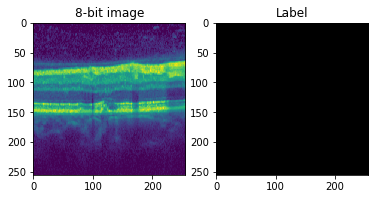

(256, 256, 1)


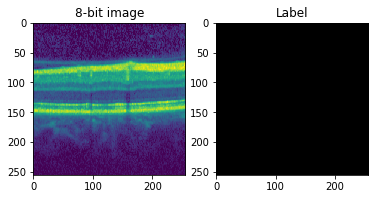

(256, 256, 1)


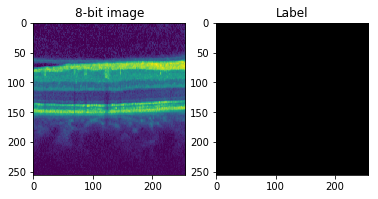

(256, 256, 1)


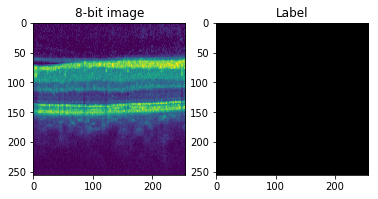

(256, 256, 1)


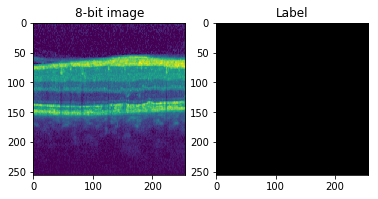

(256, 256, 1)


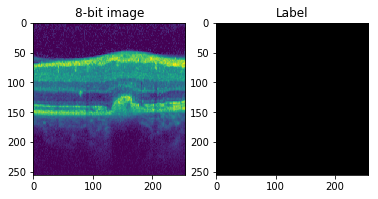

(256, 256, 1)


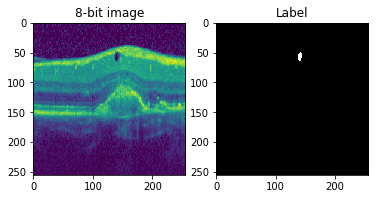

(256, 256, 1)


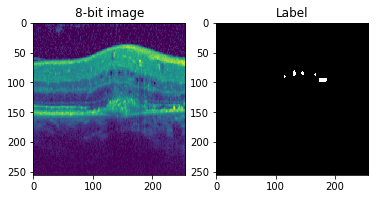

(256, 256, 1)


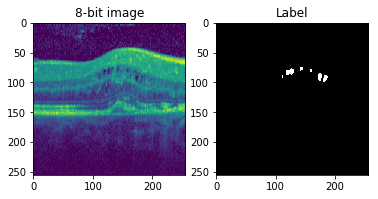

(256, 256, 1)


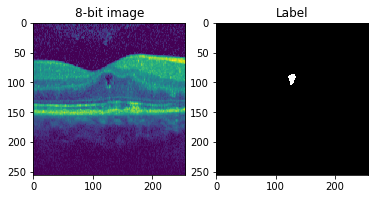

In [24]:
# print firt 10 training set images
for i in range(10):
    train_data[i].show_img()

In [25]:
matplotlib.rcParams['figure.figsize'] = [4, 3]

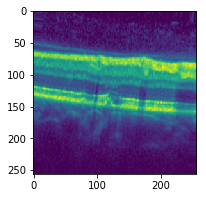

In [26]:
img, lbl = augment_image(train_data[0].img, train_data[0].label)
plt.imshow(img.reshape(height,width))

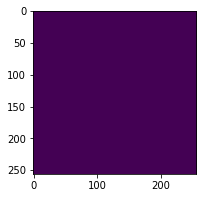

In [27]:
plt.imshow(train_data[0].label.reshape(height,width))

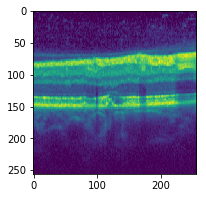

In [28]:
plt.imshow(train_data[0].img.reshape(height,width))

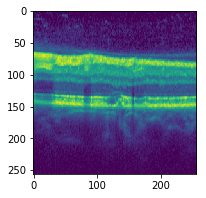

In [29]:
plt.imshow(np.fliplr(train_data[0].img.reshape(height,width)))

In [30]:
matplotlib.rcParams['figure.figsize'] = [8, 6]

### Test batch generator
Before we delve into training U-Net, it is good to test whether the patch generator and the batch generator are working as expected (for example, check if the one-hot encoding is working as expected). Let's test them now.

(6, 256, 256, 1)
(6, 256, 256, 2)
(256, 256)


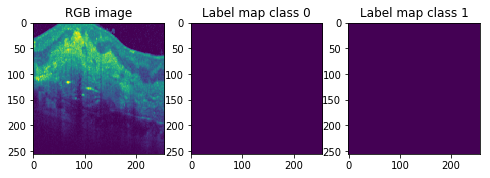

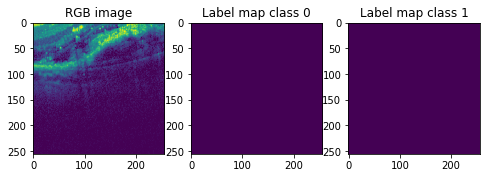

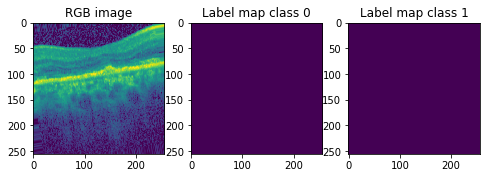

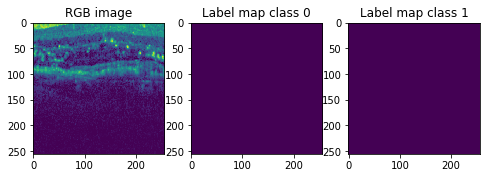

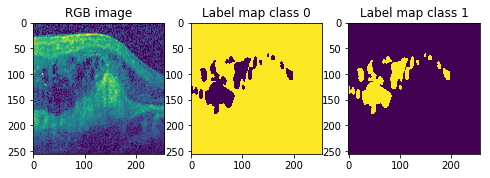

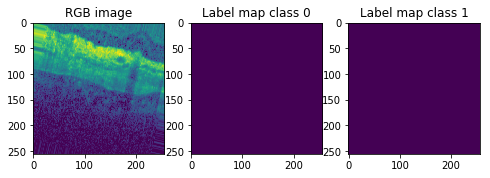

In [31]:
# define parameters for patch generator and batch creator
#patch_size = (32, 32) # input size
target_size = (height,width) # output size, might be the same as input size, but might be smaller, if valid convolutions are used
batch_size =  6 # number of patches in a mini-batch

# intialize patch generator and batch creator
#patch_generator = PatchExtractor(patch_size)
batch_generator = BatchCreator(train_data, target_size=target_size)
validation_generator = BatchCreator(validation_data, target_size=target_size)
# get one minibatch
x_data, y_data, sw = validation_generator.create_image_batch(batch_size)

print(x_data.shape)
print(y_data.shape)
print(y_data[0, :, :, 0].squeeze().shape)
for i in range(batch_size):
    plt.subplot(1, 3, 1)
    plt.imshow(x_data[i].reshape(height,width)); plt.title('RGB image')
    plt.subplot(1, 3, 2)
    plt.imshow(y_data[i, :, :, 0].squeeze()); plt.title('Label map class 0')
    plt.subplot(1, 3, 3)
    plt.imshow(y_data[i, :, :, 1].squeeze()); plt.title('Label map class 1')
    plt.show()

# Train a baseline U-Net model (U-Net 1)
Here we explicitly define a baseline U-Net model. It has a depth of 4 (3 pooling layers), it uses 'same' convolutions, it has 16 filters in the first layer, it accepts inputs of 256x256 RGB images, so it is a very simplified version of the original U-Net. For convenience, we call it ``unet_1``, to differentiat it from other U-Net models that will be built in the rest of the assignment.

In [51]:
# Create a function that builds a U-Net block, containing conv->(batchnorm->)conv->(batchnorm),
# where batchnorm is optional and can be selected via input parameter.
# The function returns the output of a convolutional (or batchnorm) layer "cl"
def unet_block(inputs, n_filters, batchnorm=True, name= None):
    
    # >> YOUR CODE HERE <<
    cl = Conv2D(n_filters,3, activation = 'relu', padding = 'same',kernel_initializer ='he_normal', name = name+"1" )(inputs)
    cl = BatchNormalization()(cl) if batchnorm else cl
    cl = Conv2D(n_filters,3,activation = 'relu', padding = 'same',kernel_initializer='he_normal',name = name+"2")(cl)
    cl = BatchNormalization()(cl) if batchnorm else cl
    
    return cl

In [52]:
def build_unet_2(initial_filters=32, n_classes=2, batchnorm=True, printmodel=False):

    # build U-Net again using unet_block function
    inputs = Input(shape=(height,width, 1))

    # CONTRACTION PART

    # First conv pool
    c1 = unet_block(inputs, initial_filters, batchnorm,name ='first')
    p1 = MaxPooling2D()(c1)

    # Second conv pool
    c2 = unet_block(p1, 2*initial_filters, batchnorm,name='second')
    p2 = MaxPooling2D()(c2)

    # Third conv pool
    c3 = unet_block(p2, 4*initial_filters, batchnorm,name='third')
    p3 = MaxPooling2D()(c3)

    # Fourth conv
    c4 = unet_block(p3, 8*initial_filters, batchnorm, name='fourth')

    # EXPANSION PART

    # First up-conv
    u2 = UpSampling2D()(c4)
    m2 = concatenate([c3, u2])
    cm2 = unet_block(m2, 4*initial_filters, batchnorm, name ='fifth')

    # Second up-conv
    u3 = UpSampling2D()(cm2)
    m3 = concatenate([c2, u3])
    cm3 = unet_block(m3, 2*initial_filters, batchnorm, name ='sixth')

    # Third up-conv
    u4 = UpSampling2D()(cm3)
    m4 = concatenate([c1, u4])
    cm4 = unet_block(m4, initial_filters, batchnorm, name = 'seventh')

    # Output
    predictions = Conv2D(n_classes, 1, activation='softmax', name = 'last')(cm4)

    model = Model(inputs, predictions)
    
    if printmodel:
        print(model.summary())
    
    return model

Make an instance of the ``unet_1`` model.

In [53]:
unet_1 = build_unet_2()

In [54]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=30, min_delta=0.001, min_lr=0.00001) #should be val_loss later

In [55]:
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=80, 
                                  mode='auto', baseline=None, restore_best_weights=False) # shoud be val_loss later

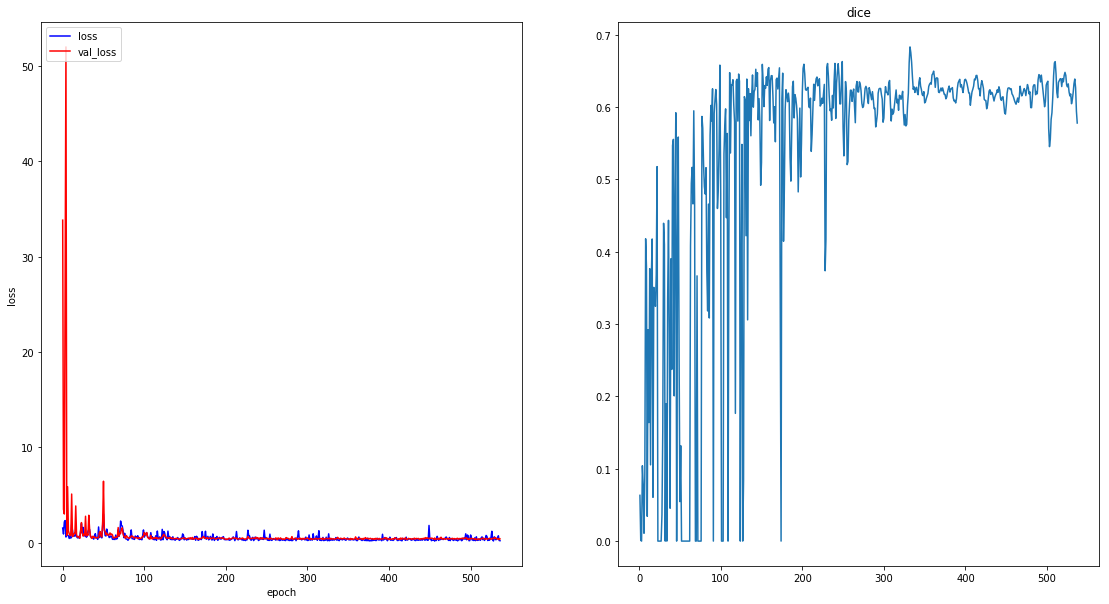

0.6832553200567218


In [56]:
# training parameters
unet_1 = build_unet_2()
model_name = 'unet_1'

training_params = {}
training_params['learning_rate'] = 0.001
training_params['patch_size'] = (height,width) # input size
training_params['target_size'] = (height,width) # output size, might be the same as input size, but might be smaller, if valid convolutions are used
training_params['batch_size'] = 6 # number of patches in a mini-batch
training_params['steps_per_epoch'] = 100 # number of iterations per epoch
training_params['epochs'] = 5000 # number of epochs

training_params['optimizer'] = SGD(lr=training_params['learning_rate'], momentum=0.99, nesterov=True)
training_params['loss'] = ['categorical_crossentropy']
#training_params['loss'] = weightedLoss(['categorical_crossentropy'],[5000,0.0001])
training_params['metrics'] = ['acc']
training_params['training_dataset'] = train_data
training_params['validation_dataset'] = validation_data

# initialize a logger, to keep track of information during training
lost_border = ((training_params['patch_size'][0]-training_params['target_size'][0])//2, (training_params['patch_size'][1]-training_params['target_size'][1])//2)
training_params['logger'] = Logger(validation_data, lost_border, data_dir, model_name)

# train model
train_model(unet_1, training_params)

After training, we can load the best saved model and apply it to the validation set and check the performance:

In [57]:
wt_path2 = os.path.join(os.getcwd(), 'unet_1.h5')
unet_1.load_weights(wt_path2)
print("Weights loaded from disk")

Weights loaded from disk


In [ ]:
#apply_model(unet_1, validation_data)

In [96]:
def get_test_scans(x_test_files):
    test_imgs = []
    origins = []
    spacings =[]
    names = []
    for t in x_test_files:
        img = load_img(t).astype('float32')
        width = img.shape[2]
        raw = sitk.ReadImage(t)
        origins.append(raw.GetOrigin())
        spacings.append(raw.GetSpacing())
        img = pad_n_crop_(img, 256, 256).reshape(img.shape[0],256,256,1)/255.
        temp = t.split('/')[-1]
        name = temp.split('.')[0]
        names.append(temp.split('.')[0])
        for i in range(img.shape[0]):
            #print(img.shape)
            image = Image(img[i,:,:], name = name, width=width)
            #print(image.get_img().shape)
            test_imgs.append(image)
    return test_imgs, spacings, origins

In [97]:
# gest b-scans for test files
test_imgs, spacings, origins = get_test_scans(x_test_files)

In [98]:
print(test_imgs[55].name)

pat077_im003


In [99]:
p = []
for i in test_imgs:
    x = unet_1.predict(i.img.reshape(1,256,256,1))
    ## xx = np.argmax(x,axis=3)
    xx = Image(pad_prediction(np.argmax(x,axis=3).reshape(256,256),(496,i.width), pad_with=0.0),name=i.name, width = i.width)
    p.append(xx)

In [100]:
k = load_img(x_test_files[14]).astype('float32')

In [101]:
keks = []
for isa in range(k.shape[0]):
    keks.append(k[isa,:,:])

In [102]:
len(keks)

18

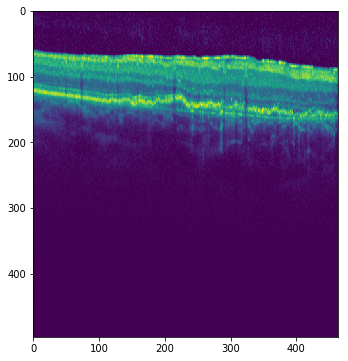

In [103]:
for i in keks:
    plt.imshow(i)

In [104]:
names = []
for n in p:
    names.append(n.name)

In [105]:
unique,counts = np.unique(names,return_counts=True)

In [106]:
print(unique)

['pat077_im001' 'pat077_im002' 'pat077_im003' 'pat078_im001'
 'pat079_im001' 'pat080_im001' 'pat081_im001' 'pat082_im001'
 'pat082_im002' 'pat083_im001' 'pat084_im001' 'pat084_im002'
 'pat085_im001' 'pat085_im002' 'pat085_im003' 'pat085_im004'
 'pat085_im005' 'pat085_im006' 'pat086_im001' 'pat086_im002'
 'pat086_im003' 'pat086_im004' 'pat087_im001' 'pat087_im002'
 'pat088_im001' 'pat088_im002' 'pat089_im001' 'pat089_im002'
 'pat089_im003' 'pat090_im001' 'pat091_im001' 'pat091_im002'
 'pat092_im001' 'pat093_im001' 'pat094_im001' 'pat095_im001'
 'pat096_im001' 'pat097_im001' 'pat098_im001' 'pat098_im002'
 'pat099_im001' 'pat100_im001' 'pat101_im001' 'pat102_im001'
 'pat103_im001' 'pat103_im002' 'pat104_im001' 'pat105_im001'
 'pat105_im002' 'pat106_im001' 'pat107_im001' 'pat108_im001']


In [107]:
volumes = []
for u in unique: 
    volume = []
    for pic in p:
        if pic.name == u:
            volume.append(pic.img)
    volumes.append(volume)

In [108]:
def save_itk(image,spacing, origin, filename):
    itkimage = sitk.GetImageFromArray(image, isVector=False)
    itkimage.SetSpacing(spacing)
    itkimage.SetOrigin(origin)
    sitk.WriteImage(itkimage, filename) 
    

In [109]:
# removes full directory
!rm -rf 'results'

In [110]:
!mkdir "results"

In [111]:
for v in range(len(volumes)):
    r = random.random()
    output_file_name = os.path.join('results', str.replace('test_x.mhd','test_x',str(v)))
    save_itk(volumes[v],spacings[v],origins[v],output_file_name)

In [112]:
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

if __name__ == '__main__':
    zipf = zipfile.ZipFile('results.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('results', zipf)
    zipf.close()


## Submit results

You can now download this zipfile with this link: [results.zip](results.zip).  
Next, upload your result to the challenge website [Icon Challenge](https://icon.grand-challenge.org/evaluation/submissions/create/).


## Optimization

You have realized that this baseline model does not perform well at all!

You can of course play around with some hyperparameter:
- learning rate
- mini-batch size
- etc.

We tried a bit and with this architecture we could not get very good performance. The good news is that now you have an example and a full pipeline that you can use to build your own U-Net model and improve the performance! In the next cells, we will implement new things to make U-Net work better.

Let'stry to improve performance. 

In [52]:
def build_unet_2(initial_filters=32, n_classes=2, batchnorm=True, printmodel=False):

    # build U-Net again using unet_block function
    inputs = Input(shape=(height,width, 1))

    # CONTRACTION PART

    # First conv pool
    c1 = unet_block(inputs, initial_filters, batchnorm,name ='first')
    p1 = MaxPooling2D()(c1)

    # Second conv pool
    c2 = unet_block(p1, 2*initial_filters, batchnorm,name='second')
    p2 = MaxPooling2D()(c2)

    # Third conv pool
    c3 = unet_block(p2, 4*initial_filters, batchnorm,name='third')
    p3 = MaxPooling2D()(c3)

    # Fourth conv
    c4 = unet_block(p3, 8*initial_filters, batchnorm, name='fourth')

    # EXPANSION PART

    # First up-conv
    u2 = UpSampling2D()(c4)
    m2 = concatenate([c3, u2])
    cm2 = unet_block(m2, 4*initial_filters, batchnorm, name ='fifth')

    # Second up-conv
    u3 = UpSampling2D()(cm2)
    m3 = concatenate([c2, u3])
    cm3 = unet_block(m3, 2*initial_filters, batchnorm, name ='sixth')

    # Third up-conv
    u4 = UpSampling2D()(cm3)
    m4 = concatenate([c1, u4])
    cm4 = unet_block(m4, initial_filters, batchnorm, name = 'seventh')

    # Output
    predictions = Conv2D(n_classes, 1, activation='softmax', name = 'last')(cm4)

    model = Model(inputs, predictions)
    
    if printmodel:
        print(model.summary())
    
    return model

Make an instance of the ``unet_1`` model.

In [53]:
unet_1 = build_unet_2()

In [54]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5,
                              patience=30, min_delta=0.001, min_lr=0.00001) #should be val_loss later

In [55]:
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=80, 
                                  mode='auto', baseline=None, restore_best_weights=False) # shoud be val_loss later

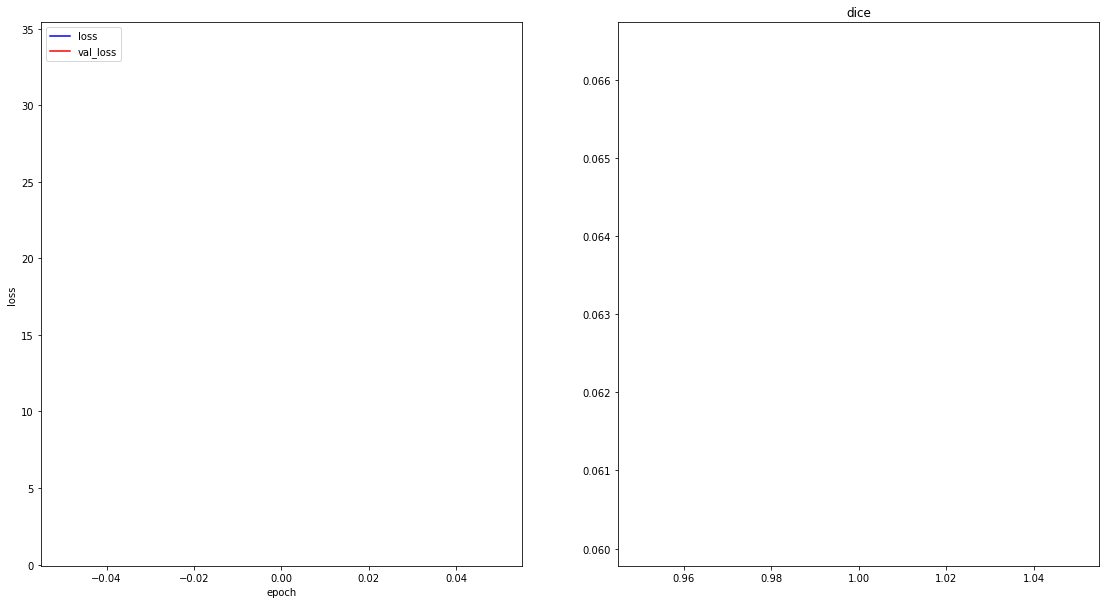

0.06325842790693444
Epoch 2/5000
 38/100 [==========>...................] - ETA: 4s - loss: 0.5162 - acc: 0.9807

In [ ]:
# training parameters
unet_1 = build_unet_2()
model_name = 'unet_1'

training_params = {}
training_params['learning_rate'] = 0.001
training_params['patch_size'] = (height,width) # input size
training_params['target_size'] = (height,width) # output size, might be the same as input size, but might be smaller, if valid convolutions are used
training_params['batch_size'] = 6 # number of patches in a mini-batch
training_params['steps_per_epoch'] = 100 # number of iterations per epoch
training_params['epochs'] = 5000 # number of epochs

training_params['optimizer'] = SGD(lr=training_params['learning_rate'], momentum=0.99, nesterov=True)
training_params['loss'] = ['categorical_crossentropy']
#training_params['loss'] = weightedLoss(['categorical_crossentropy'],[5000,0.0001])
training_params['metrics'] = ['acc']
training_params['training_dataset'] = train_data
training_params['validation_dataset'] = validation_data

# initialize a logger, to keep track of information during training
lost_border = ((training_params['patch_size'][0]-training_params['target_size'][0])//2, (training_params['patch_size'][1]-training_params['target_size'][1])//2)
training_params['logger'] = Logger(validation_data, lost_border, data_dir, model_name)

# train model
train_model(unet_1, training_params)

After training, we can load the best saved model and apply it to the validation set and check the performance:

In [ ]:
wt_path2 = os.path.join(os.getcwd(), 'unet_1.h5')
unet_1.load_weights(wt_path2)
print("Weights loaded from disk")

In [ ]:
#apply_model(unet_1, validation_data)

In [ ]:
x_test_files = get_file_list(os.path.join(TEST_FOLDER,'images/'), 'mhd')
test_imgs = []
origins = []
spacings =[]
names = []
for t in x_test_files:
    img = load_img(t).astype('float32')
    width = img.shape[2]
    raw = sitk.ReadImage(t)
    origins.append(raw.GetOrigin())
    spacings.append(raw.GetSpacing())
    img = pad_n_crop_(img, 256, 256).reshape(img.shape[0],256,256,1)/255.
    temp = t.split('/')[-1]
    name = temp.split('.')[0]
    names.append(temp.split('.')[0])
    for i in range(img.shape[0]):
        #print(img.shape)
        image = Image(img[i,:,:], name = name, width=width)
        #print(image.get_img().shape)
        test_imgs.append(image)

In [ ]:
print(test_imgs[55].name)

In [ ]:
p = []
for i in test_imgs:
    x = unet_1.predict(i.img.reshape(1,256,256,1))
    ## xx = np.argmax(x,axis=3)
    xx = Image(pad_prediction(np.argmax(x,axis=3).reshape(256,256),(496,i.width), pad_with=0.0),name=i.name, width = i.width)
    p.append(xx)